In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
df = pd.read_csv('netflix_titles.csv')
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [28]:
df.head()
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [30]:
df.shape

(8807, 12)

In [31]:
df.duplicated().sum()

0

In [32]:
print("Percentage Of Missing Values")
Perc_Of_Missing_Values=df.isna().sum()/len(df)*100
Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0]

Percentage Of Missing Values


director      29.908028
cast           9.367549
country        9.435676
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64

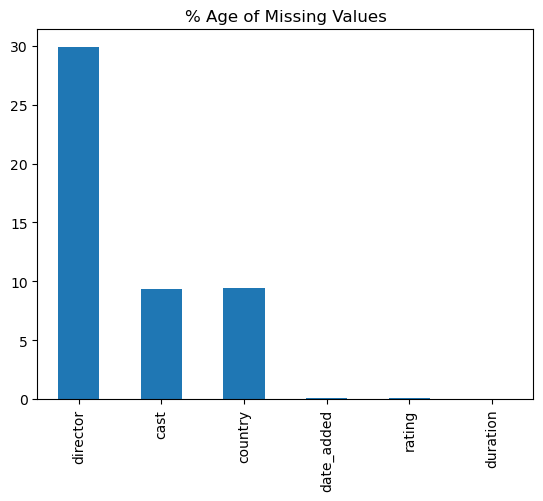

In [33]:
only_missing=Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0]
only_missing.plot(kind="bar")
plt.title("% Age of Missing Values")
plt.show()

In [34]:
df.drop("cast",axis=1,inplace=True)
df.drop("director",axis=1,inplace=True)
df.drop("show_id",axis=1,inplace=True)
df.drop("description",axis=1,inplace=True)
df["country"]=df["country"].fillna(df["country"].mode()[0])
df["rating"]=df["rating"].fillna(df["rating"].mode()[0])
df[df.date_added.isna()]

,type,title,country,date_added,release_year,rating,duration,listed_in
6066,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
6174,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries
6795,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies"
6806,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies"
6901,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows"
7196,TV Show,Kikoriki,United States,NaN,2010,TV-Y,2 Seasons,Kids' TV
7254,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh..."
7406,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
7847,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
8182,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"


In [35]:
if df.duplicated().sum()==0:
    
    print("The dataframe doesn't contain duplicates. So, no removal is carried out")
    
else:
    
    print('The dataframe contains '+str(df.duplicated().sum())+' duplicates. So, removal is performed.')
    
    df=df.drop_duplicates(subset='title')
    
    #Check the removing has been successful
    
    print('After removing process the dataframe contains '+str(df.duplicated().sum())+' duplicates.')

The dataframe doesn't contain duplicates. So, no removal is carried out


<AxesSubplot:>

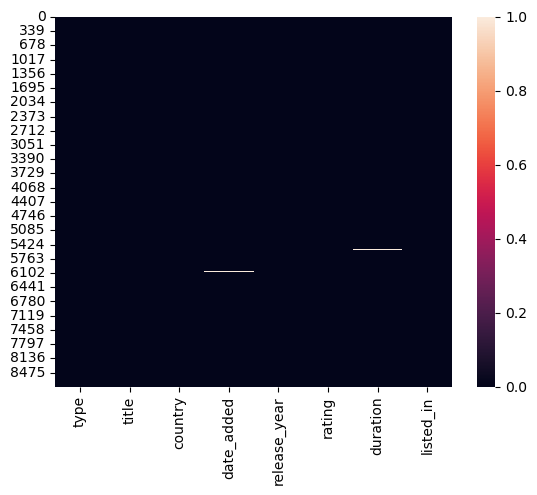

In [38]:
sns.heatmap(df.isnull())
    
  

In [41]:
def check_null(df):
    for i in df.columns:
        null_num = df[i].isna().sum()
        null_rate = null_num / len(df) * 100 
        if null_rate > 0 :
            print("{0}: # of null: {1}  null rate: {2}%".format(i, null_num, round(null_rate,2)))
            
check_null(df)

date_added: # of null: 10  null rate: 0.11%
duration: # of null: 3  null rate: 0.03%
